<a href="https://colab.research.google.com/github/Laofin050/Tugas-Praktikum_049-050/blob/main/Project_Fix_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tulis Program Anda Disini!

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Disease"

In [ ]:
%cd /content/drive/My Drive/Disease

/content/drive/My Drive/Disease


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
ls

kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:51<00:00, 61.2MB/s]
100% 2.29G/2.29G [00:51<00:00, 47.5MB/s]


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
ls

chest_xray/  kaggle.json


In [ ]:
from os import mkdir

mkdir ('Data')

In [ ]:
import shutil,sys

shutil.move("/content/drive/My Drive/Disease/chest_xray/train/NORMAL", "/content/drive/My Drive/Disease/Data")
shutil.move("/content/drive/My Drive/Disease/chest_xray/train/PNEUMONIA", "/content/drive/My Drive/Disease/Data")

'/content/drive/My Drive/Disease/Data/PNEUMONIA'

In [ ]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile

TRAIN_DIR = "/content/drive/My Drive/Disease/Train/"
VALID_DIR ="/content/drive/My Drive/Disease/Valid/"
TEST_DIR ="/content/drive/My Drive/Disease/Test/"

os.mkdir(TRAIN_DIR)
os.mkdir(VALID_DIR)
os.mkdir(TEST_DIR)

for label in ['NORMAL', 'PNEUMONIA']:
    os.mkdir(TRAIN_DIR+label)
    os.mkdir(VALID_DIR+label)
    os.mkdir(TEST_DIR+label)

In [ ]:
import random

def train_valid_test_split(source, train_dir, valid_dir, test_dir,train_size, valid_size, test_size):
    # get files
    files = []
    for filename in os.listdir(source):
        file = source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
    
    # train valid split
    train_size = int(len(files) * (1-(valid_size + train_size)))
    valid_size = int(len(files) * (1-(valid_size + test_size)))
    test_size = int(len(files) * (1-train_size))
  
    # shuffle the dataset
    shuffled_files = random.sample(files, len(files))
    
    train_set = shuffled_files[train_size:valid_size]
    valid_set = shuffled_files[valid_size:]
    test_set = shuffled_files[:train_size]
    
    for filename in train_set:
        filepath = source + filename
        destination = train_dir + filename
        copyfile(filepath, destination)
        
    for filename in valid_set:
        filepath = source + filename
        destination = valid_dir + filename
        copyfile(filepath, destination)
    
    for filename in test_set:
        filepath = source + filename
        destination = test_dir + filename
        copyfile(filepath, destination)

SOURCE = "/content/drive/My Drive/Disease/Data/"

for label in ['NORMAL', 'PNEUMONIA']:
    print(label)
    train_valid_test_split(SOURCE+label+'/',  TRAIN_DIR +label+'/', VALID_DIR +label+'/', TEST_DIR +label+'/', train_size=0.8, valid_size=0.19, test_size=0.01)
    print('Total images: ', len(os.listdir(SOURCE +label+'/')))
    print('Training: ', len(os.listdir(TRAIN_DIR +label+'/')))
    print('Validation: ', len(os.listdir(VALID_DIR +label+'/')))
    print('Testing: ', len(os.listdir(TEST_DIR +label+'/')))
    print()

NORMAL
Total images:  1341
Training:  1059
Validation:  269
Testing:  13

PNEUMONIA
Total images:  3875
Training:  3062
Validation:  775
Testing:  38



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 90,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    zoom_range = 0.2
)

test_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.7
)

In [ ]:
train_images = train_generator.flow_from_directory(
    TRAIN_DIR,
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
val_images = test_generator.flow_from_directory(
    VALID_DIR,
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset = 'training'
)

test_images = test_generator.flow_from_directory(
    TEST_DIR,
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset = 'validation'
)

Found 4121 images belonging to 2 classes.
Found 314 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


**MODELLING**

In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 31, 31, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)      

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_images,
                   epochs = 100,
                   validation_data = val_images,
                   callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                       monitor='val_loss',
                       factor=0.5,
                       patience=40,
                       verbose = 1,
                       mode= 'auto',
                       cooldown = 1
                   )])

Epoch 1/100
129/129 [==============================] - 76s 553ms/step - loss: 0.8015 - accuracy: 0.5834 - val_loss: 0.7915 - val_accuracy: 0.7420 - lr: 1.0000e-04
Epoch 2/100
129/129 [==============================] - 65s 506ms/step - loss: 0.6635 - accuracy: 0.6860 - val_loss: 1.1685 - val_accuracy: 0.7420 - lr: 1.0000e-04
Epoch 3/100
129/129 [==============================] - 65s 507ms/step - loss: 0.5825 - accuracy: 0.7384 - val_loss: 1.0272 - val_accuracy: 0.7420 - lr: 1.0000e-04
Epoch 4/100
129/129 [==============================] - 65s 505ms/step - loss: 0.5775 - accuracy: 0.7445 - val_loss: 0.7854 - val_accuracy: 0.7420 - lr: 1.0000e-04
Epoch 5/100
129/129 [==============================] - 66s 513ms/step - loss: 0.5323 - accuracy: 0.7755 - val_loss: 0.5339 - val_accuracy: 0.7420 - lr: 1.0000e-04
Epoch 6/100
129/129 [==============================] - 66s 515ms/step - loss: 0.5035 - accuracy: 0.7823 - val_loss: 0.4269 - val_accuracy: 0.7707 - lr: 1.0000e-04
Epoch 7/100
129/129 [=

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

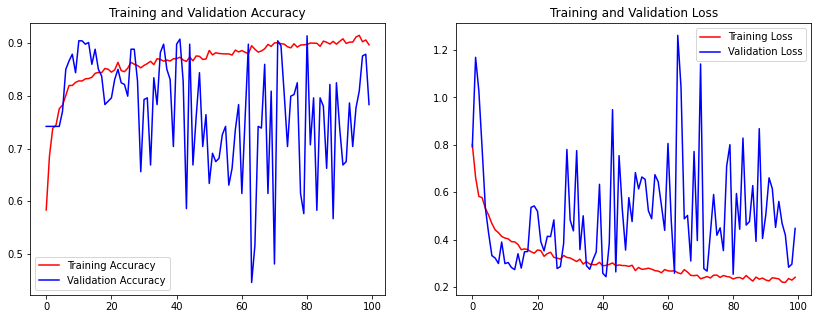

In [ ]:
eval_plot(history)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate(model):
  valid_generator = train_generator.flow_from_directory(
      TRAIN_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='categorical',
      shuffle = False)

  batch_size = 32
  num_of_test_samples = len(valid_generator.filenames)

  Y_pred = model.predict_generator(valid_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(valid_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['NORMAL', 'PNEUMONIA'])
  plt.yticks(ticks=[0.5, 1.5], labels=['NORMAL', 'PNEUMONIA'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['NORMAL', 'PNEUMONIA']
  print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model is {:.2f}".format(recall))
  print("Precision of the model is {:.2f}".format(precision))
  print("F-1 Score of the model is {:.2f}".format(f)) 

Found 4121 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  from ipykernel import kernelapp as app



Confusion Matrix



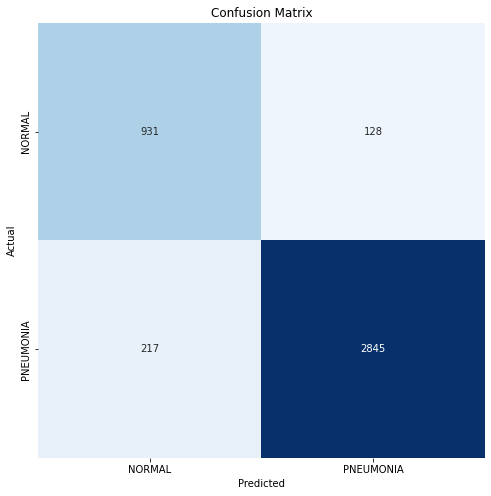



Classification Report

              precision    recall  f1-score   support

      NORMAL       0.81      0.88      0.84      1059
   PNEUMONIA       0.96      0.93      0.94      3062

    accuracy                           0.92      4121
   macro avg       0.88      0.90      0.89      4121
weighted avg       0.92      0.92      0.92      4121

Recall of the model is 0.93
Precision of the model is 0.96
F-1 Score of the model is 0.94


In [ ]:
evaluate(model)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("ML.json", "w") as json_file: json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


MODEL 2

In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='elu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='elu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='elu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='elu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
# Print model summary
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import SGD

model2.compile(optimizer=SGD(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history2 = model2.fit(train_images,
                   epochs = 100,
                   validation_data = val_images,
                   callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                       monitor='val_loss',
                       factor=0.5,
                       patience=40,
                       verbose = 1,
                       mode= 'auto',
                       cooldown = 1
                   )])

Epoch 1/100
129/129 [==============================] - 76s 506ms/step - loss: 0.8744 - accuracy: 0.5491 - val_loss: 0.8320 - val_accuracy: 0.2580 - lr: 0.0010
Epoch 2/100
129/129 [==============================] - 65s 501ms/step - loss: 0.7029 - accuracy: 0.6503 - val_loss: 0.5115 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 3/100
129/129 [==============================] - 66s 511ms/step - loss: 0.6346 - accuracy: 0.6921 - val_loss: 0.4862 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 4/100
129/129 [==============================] - 66s 513ms/step - loss: 0.5901 - accuracy: 0.7188 - val_loss: 0.3578 - val_accuracy: 0.8121 - lr: 0.0010
Epoch 5/100
129/129 [==============================] - 68s 529ms/step - loss: 0.5390 - accuracy: 0.7539 - val_loss: 0.3576 - val_accuracy: 0.8217 - lr: 0.0010
Epoch 6/100
129/129 [==============================] - 66s 511ms/step - loss: 0.5210 - accuracy: 0.7646 - val_loss: 0.4594 - val_accuracy: 0.7962 - lr: 0.0010
Epoch 7/100
129/129 [=========================

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history2):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history2.history['accuracy']
  val_acc = history2.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history2.history['loss']
  val_loss = history2.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

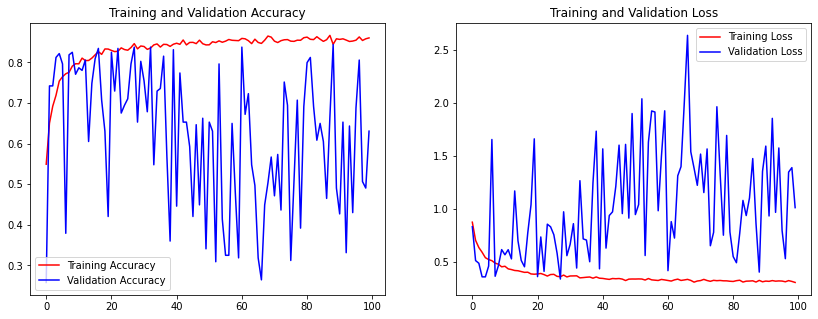

In [ ]:
eval_plot(history2)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate(model2):
  valid_generator = train_generator.flow_from_directory(
      TRAIN_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='categorical',
      shuffle = False)

  batch_size = 32
  num_of_test_samples = len(valid_generator.filenames)

  Y_pred = model2.predict_generator(valid_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(valid_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['NORMAL', 'PNEUMONIA'])
  plt.yticks(ticks=[0.5, 1.5], labels=['NORMAL', 'PNEUMONIA'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['NORMAL', 'PNEUMONIA']
  print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model2 is {:.2f}".format(recall))
  print("Precision of the model2 is {:.2f}".format(precision))
  print("F-1 Score of the model2 is {:.2f}".format(f)) 

Found 4121 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  from ipykernel import kernelapp as app



Confusion Matrix



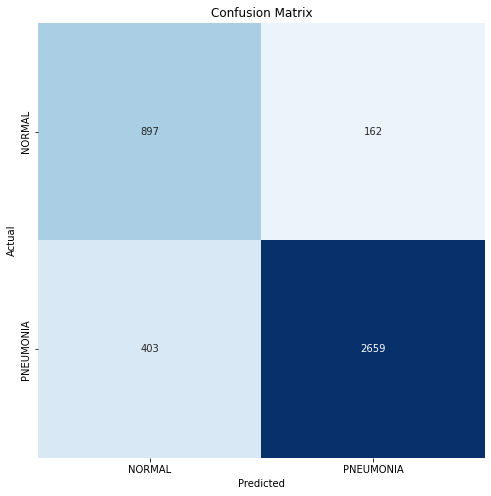



Classification Report

              precision    recall  f1-score   support

      NORMAL       0.69      0.85      0.76      1059
   PNEUMONIA       0.94      0.87      0.90      3062

    accuracy                           0.86      4121
   macro avg       0.82      0.86      0.83      4121
weighted avg       0.88      0.86      0.87      4121

Recall of the model2 is 0.87
Precision of the model2 is 0.94
F-1 Score of the model2 is 0.90


In [ ]:
evaluate(model2)

In [ ]:
# serialize model to JSON
model_json = model2.to_json()
with open("ML.json", "w") as json_file: json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model2.save("model2.h5")
print("Saved model to disk")

Saved model to disk


MODEL 3

In [ ]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
# Print model summary
print(model3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adadelta

model3.compile(optimizer=Adadelta(lr=0.01), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


In [ ]:
history3 = model3.fit(train_images,
                   epochs = 100,
                   validation_data = val_images,
                   callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                       monitor='val_loss',
                       factor=0.5,
                       patience=40,
                       verbose = 1,
                       mode= 'auto',
                       cooldown = 1
                   )])

Epoch 1/100
129/129 [==============================] - 90s 618ms/step - loss: 1.0259 - accuracy: 0.5309 - val_loss: 0.6269 - val_accuracy: 0.7420 - lr: 0.0100
Epoch 2/100
129/129 [==============================] - 78s 604ms/step - loss: 0.9650 - accuracy: 0.5484 - val_loss: 0.5831 - val_accuracy: 0.7420 - lr: 0.0100
Epoch 3/100
129/129 [==============================] - 82s 639ms/step - loss: 0.9472 - accuracy: 0.5625 - val_loss: 0.5765 - val_accuracy: 0.7420 - lr: 0.0100
Epoch 4/100
129/129 [==============================] - 71s 553ms/step - loss: 0.9015 - accuracy: 0.5787 - val_loss: 0.5808 - val_accuracy: 0.7420 - lr: 0.0100
Epoch 5/100
129/129 [==============================] - 69s 534ms/step - loss: 0.8831 - accuracy: 0.5817 - val_loss: 0.5864 - val_accuracy: 0.7420 - lr: 0.0100
Epoch 6/100
129/129 [==============================] - 71s 551ms/step - loss: 0.8816 - accuracy: 0.5889 - val_loss: 0.5874 - val_accuracy: 0.7420 - lr: 0.0100
Epoch 7/100
129/129 [=========================

In [ ]:
import matplotlib.pyplot as plt
def eval_plot(history3):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history3.history['accuracy']
  val_acc = history3.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history3.history['loss']
  val_loss = history3.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

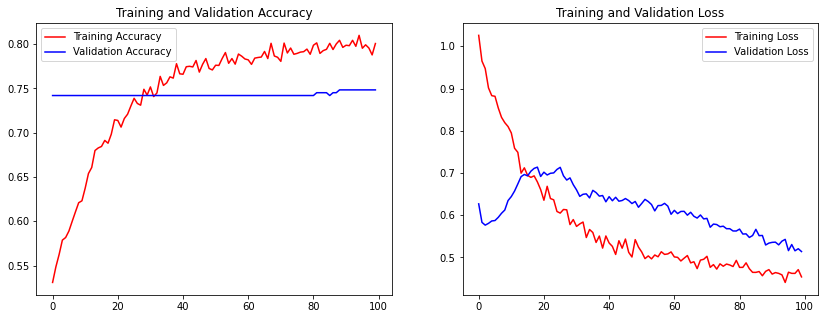

In [ ]:
eval_plot(history3)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate(model3):
  valid_generator = train_generator.flow_from_directory(
      TRAIN_DIR, 
      target_size=(64,64), 
      batch_size=32, 
      class_mode='categorical',
      shuffle = False)

  batch_size = 32
  num_of_test_samples = len(valid_generator.filenames)

  Y_pred = model3.predict_generator(valid_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(valid_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['NORMAL', 'PNEUMONIA'])
  plt.yticks(ticks=[0.5, 1.5], labels=['NORMAL', 'PNEUMONIA'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['NORMAL', 'PNEUMONIA']
  print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

  tn, fp, fn, tp = cm.ravel()

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f = 2*((precision*recall)/(precision+recall))

  print("Recall of the model3 is {:.2f}".format(recall))
  print("Precision of the model3 is {:.2f}".format(precision))
  print("F-1 Score of the model3 is {:.2f}".format(f)) 

Found 4121 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  from ipykernel import kernelapp as app



Confusion Matrix



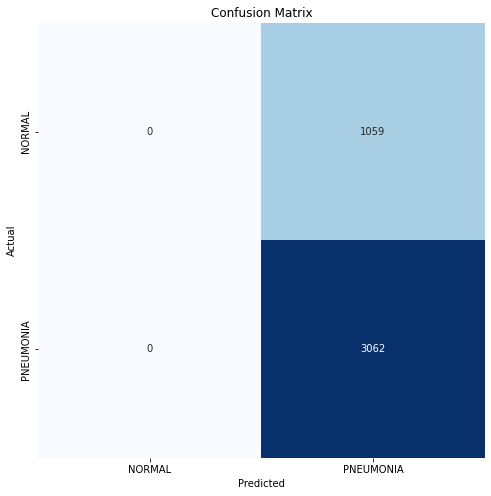



Classification Report

              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00      1059
   PNEUMONIA       0.74      1.00      0.85      3062

    accuracy                           0.74      4121
   macro avg       0.37      0.50      0.43      4121
weighted avg       0.55      0.74      0.63      4121

Recall of the model3 is 1.00
Precision of the model3 is 0.74
F-1 Score of the model3 is 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
evaluate(model3)

In [ ]:
# serialize model to JSON
model_json = model3.to_json()
with open("ML.json", "w") as json_file: json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model3.save("model3.h5")
print("Saved model to disk")

Saved model to disk
